In [1]:
from tree_detection_framework.detection.detector import (
    Detector,
    DeepForestDetector,
    Detectree2Detector,
)
from tree_detection_framework.detection.models import DeepForestModule, Detectree2Module
from tree_detection_framework.postprocessing.postprocessing import (
    single_region_NMS,
    multi_region_NMS,
    remove_out_of_bounds_detections,
)
from tree_detection_framework.preprocessing.preprocessing import (
    create_image_dataloader,
)
import torch

/ofo-share/repos-amritha/conda/envs/tdf-test-polygonenms/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataloader = create_image_dataloader(
    "/ofo-share/scratch-amritha/raw_drone_images_for_testing",
    chip_size=2200,
    chip_stride=2000,
    batch_size=4,
)

INFO:root:Units set in PIXELS


In [3]:
# The device to use for inference, GPU or CPU
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Setup the parameters dictionary use DeepForest
DEEPFOREST_MODEL_PARAMS = {
    "backbone": "retinanet",
    "num_classes": 1,
}
# This model uses pretrained weights from DeepForest
module = DeepForestModule(DEEPFOREST_MODEL_PARAMS).to(DEVICE)
detector = DeepForestDetector(module)


# # Setup the parameters dictionary use Detectree2
# DETECTREE2_MODEL_PARAMS = {
#     "update_model": "/ofo-share/repos-amritha/detectree2-code/230103_randresize_full.pth"
# }
# # This model uses pretrained weights from Detectree2
# module = Detectree2Module(DETECTREE2_MODEL_PARAMS)
# detector = Detectree2Detector(module)


region_detection_sets, filenames, true_bounds = detector.predict_raw_drone_images(
    dataloader
)

Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


Performing prediction on batches: 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]


In [4]:
region_detection_sets

In [5]:
filenames

['/ofo-share/scratch-amritha/raw_drone_images_for_testing/DJI_0059.JPG',
 '/ofo-share/scratch-amritha/raw_drone_images_for_testing/DJI_0061.JPG',
 '/ofo-share/scratch-amritha/raw_drone_images_for_testing/DJI_0063.JPG']

Before Post-processing
--

/ofo-share/repos-amritha/conda/envs/tdf-test-polygonenms/lib/python3.10/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


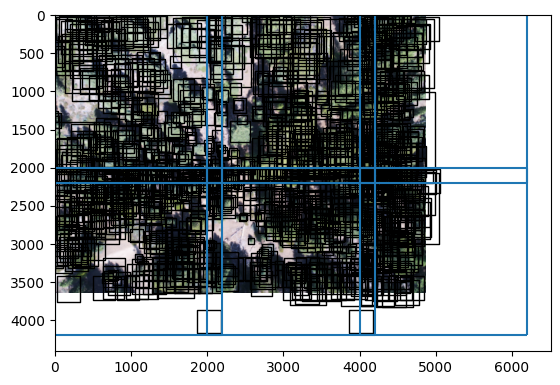

/ofo-share/repos-amritha/conda/envs/tdf-test-polygonenms/lib/python3.10/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


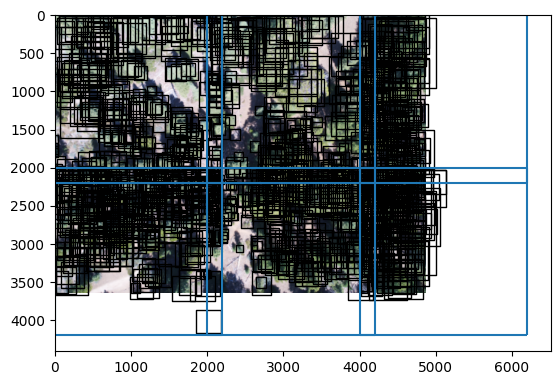

/ofo-share/repos-amritha/conda/envs/tdf-test-polygonenms/lib/python3.10/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


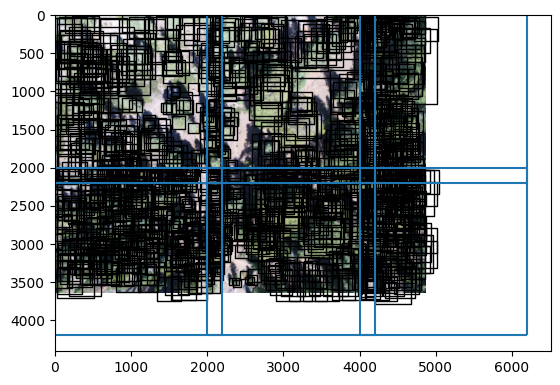

In [6]:
for rds, img in zip(region_detection_sets, filenames):
    rds.plot(raster_file=img)

After Post-processing
--
Removing out-of-bounds detections

In [ ]:
filtered_result = remove_out_of_bounds_detections(region_detection_sets, true_bounds)
for rds, img in zip(filtered_result, filenames):
    rds.plot(raster_file=img)

INFO:root:Bound have overlap, running across-region NMS


/ofo-share/repos-amritha/conda/envs/tdf-test-polygonenms/lib/python3.10/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


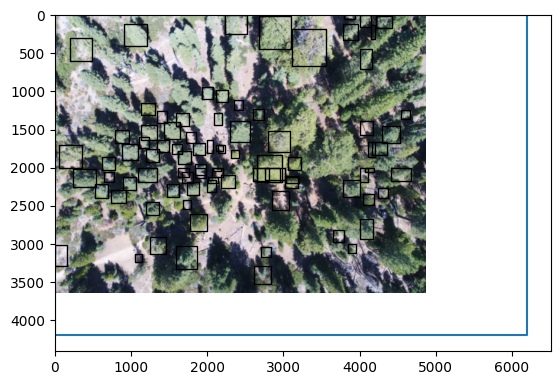

In [9]:
rds0 = filtered_result[0]
rds0_nms = multi_region_NMS(rds0)
rds0_nms.plot(
    raster_file="/ofo-share/scratch-amritha/raw_drone_images_for_testing/DJI_0059.JPG"
)